# DATA 119 Final Project

### Kris Peng and Sam Leung


#### Project A

In [298]:
import numpy as np
import pandas as pd
import plotnine as p9
import statsmodels.api as sm 
import sklearn.metrics as metrics

In [299]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
pd.set_option('display.max_rows', None)
df.head(5)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [300]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [301]:
#These variables are meaningless
#so we decide to delete them

df = df.drop(columns=['ID', 'Z_CostContact','Z_Revenue'])
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [302]:
# Name the variables in a more meaning way

df = df.rename(columns={"Response": "AcceptedLastCmp"})
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedLastCmp'],
      dtype='object')

In [303]:
df['Income'].isna().sum() / df.shape[0]
#only 1% missing data, so let's drop it
df = df.dropna()

In [304]:
#Summary statistics for variables
print(df['Year_Birth'].describe())

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


In [305]:
print(df[df['Year_Birth'] < 1920]['Dt_Customer'])
print("It looks like some data entry error")
print("because it is quite impossible to be born that early \nand become a customer for the first time in 2010s.")
print("So we can delete the data")

index = df[df['Year_Birth'] < 1920].index
df = df.drop(index)

192    26-09-2013
239    17-05-2014
339    26-09-2013
Name: Dt_Customer, dtype: object
It looks like some data entry error
because it is quite impossible to be born that early 
and become a customer for the first time in 2010s.
So we can delete the data


In [306]:
#Summary statistics for variables
print(df['Year_Birth'].describe())

count    2213.000000
mean     1968.917307
std        11.700216
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


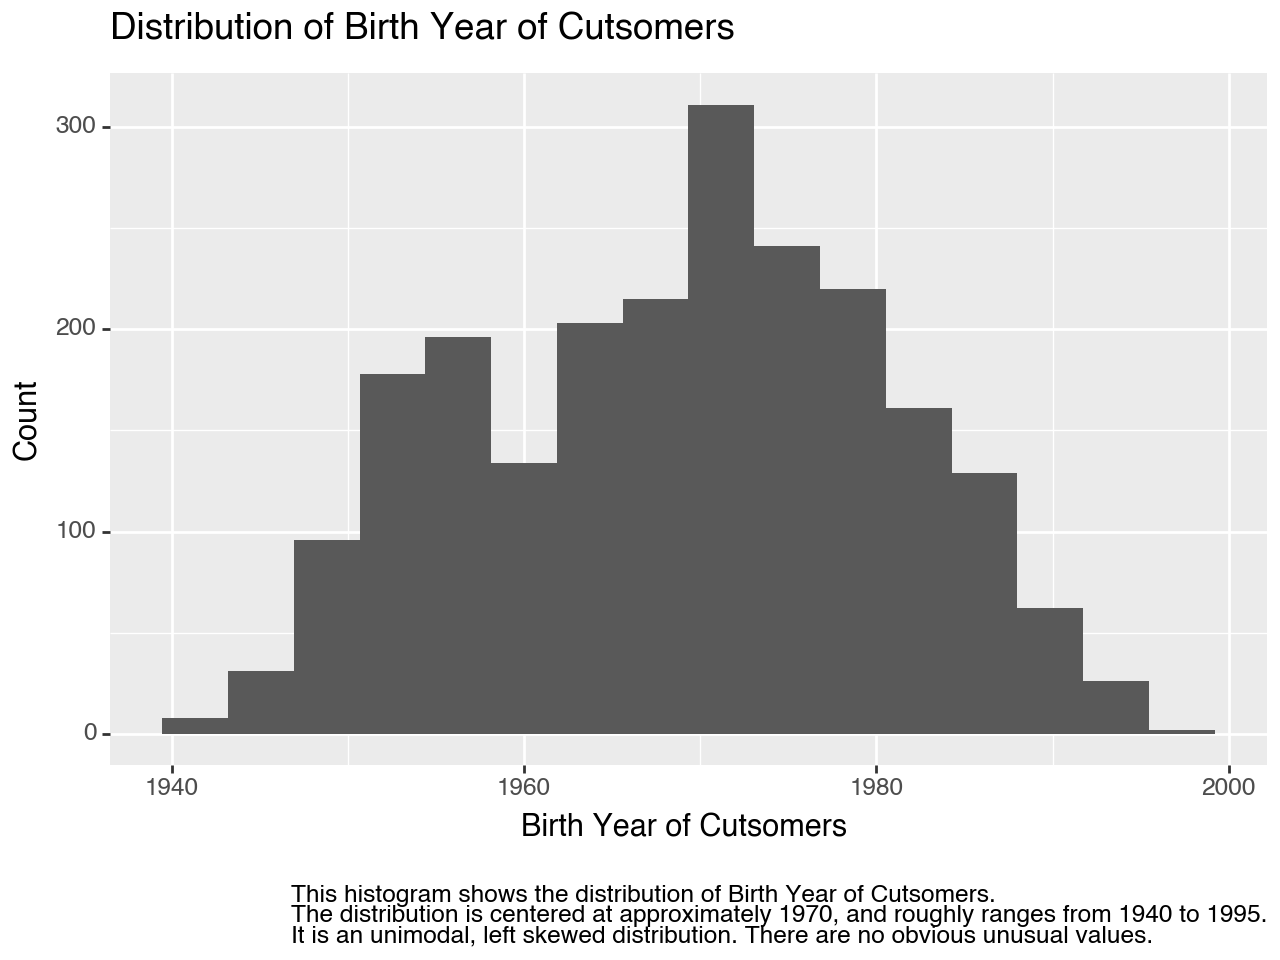

<Figure Size: (640 x 480)>

In [307]:
# Visualize the distirbution of variables
(p9.ggplot(df) + 
 p9.aes (x = 'Year_Birth') + 
 p9.geom_histogram(bins=16)+ 
 p9.labs(x = "Birth Year of Cutsomers \n", y = "Count",title= "Distribution of Birth Year of Cutsomers", 
         caption = "This histogram shows the distribution of Birth Year of Cutsomers.\n" +
          "The distribution is centered at approximately 1970, and roughly ranges from 1940 to 1995.\n" + 
          "It is an unimodal, left skewed distribution. There are no obvious unusual values."))


In [308]:
print(df['Income'].describe())

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


In [309]:
print(df['Income'].describe())

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


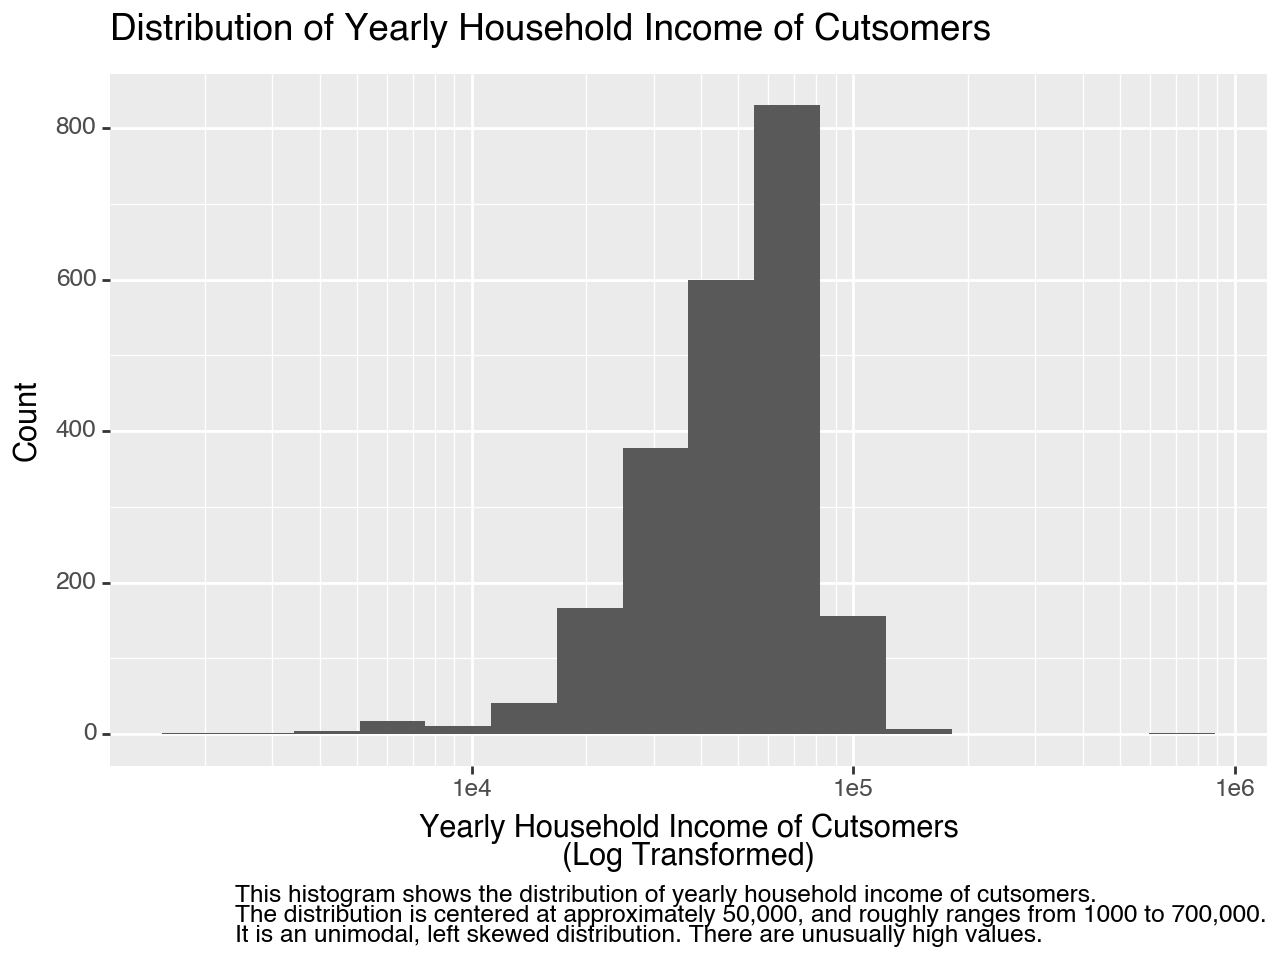

<Figure Size: (640 x 480)>

In [310]:
# Visualize the distirbution of variables
(p9.ggplot(df) + 
 p9.aes (x = 'Income') + 
 p9.geom_histogram(bins=16)+ 
 p9.scale_x_log10() +
 p9.labs(x = "Yearly Household Income of Cutsomers\n(Log Transformed)", y = "Count",title= "Distribution of Yearly Household Income of Cutsomers", 
         caption = "This histogram shows the distribution of yearly household income of cutsomers.\n" +
          "The distribution is centered at approximately 50,000, and roughly ranges from 1000 to 700,000.\n" + 
          "It is an unimodal, left skewed distribution. There are unusually high values."))


In [311]:

print(df['Dt_Customer'].describe())

count           2213
unique           662
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object


In [312]:

print(df['Recency'].describe())

count    2213.000000
mean       49.007682
std        28.941864
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


In [313]:
print(df['MntWines'].describe())

count    2213.000000
mean      305.153638
std       337.305490
min         0.000000
25%        24.000000
50%       175.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64


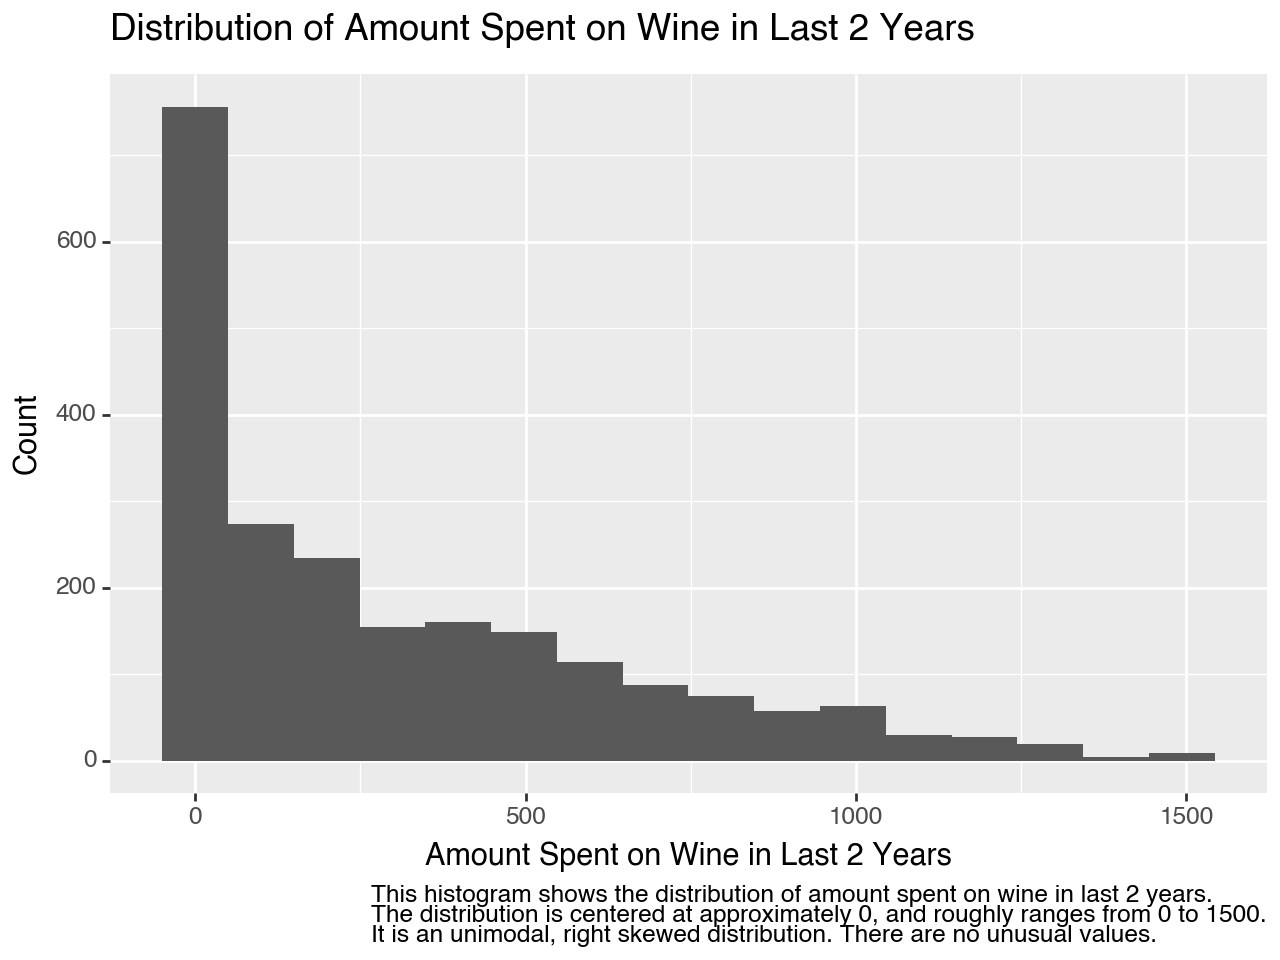

<Figure Size: (640 x 480)>

In [314]:
# Visualize the distirbution of variables
(p9.ggplot(df) + 
 p9.aes (x = 'MntWines') + 
 p9.geom_histogram(bins=16)+ 
 p9.labs(x = "Amount Spent on Wine in Last 2 Years", y = "Count",title= "Distribution of Amount Spent on Wine in Last 2 Years", 
         caption = "This histogram shows the distribution of amount spent on wine in last 2 years.\n" +
          "The distribution is centered at approximately 0, and roughly ranges from 0 to 1500.\n" + 
          "It is an unimodal, right skewed distribution. There are no unusual values."))

In [315]:
print(df['MntFruits'].describe())

count    2213.000000
mean       26.323995
std        39.735932
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


In [316]:
print(df['MntMeatProducts'].describe())

count    2213.000000
mean      166.962494
std       224.226178
min         0.000000
25%        16.000000
50%        68.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


In [317]:
print(df['MntFishProducts'].describe())

count    2213.000000
mean       37.635337
std        54.763278
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64


In [318]:
print(df['MntSweetProducts'].describe())

count    2213.000000
mean       27.034794
std        41.085433
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: MntSweetProducts, dtype: float64


In [319]:
print(df['MntGoldProds'].describe())

count    2213.000000
mean       43.911432
std        51.699746
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64


In [320]:
print(df['NumDealsPurchases'].describe())

count    2213.000000
mean        2.325350
std         1.924402
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


In [321]:
print(df['NumWebPurchases'].describe())

count    2213.000000
mean        4.087664
std         2.741664
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


In [322]:
print(df['NumCatalogPurchases'].describe())

count    2213.000000
mean        2.671487
std         2.927096
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


In [323]:
print(df['NumStorePurchases'].describe())

count    2213.000000
mean        5.805242
std         3.250752
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


In [324]:
print(df['NumWebVisitsMonth'].describe())

count    2213.000000
mean        5.321735
std         2.425092
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64
